# P-ONE basic data analysis-4

The data analysis has been performed on a P-ONE simulation file. Each file has 1000 DAQ frames, which corresponds to 1000 events. Here, the data shown is for 66000 events. Each frame contains following 9 files, each with an unique set of information:

1) **I3EventHeader**: Contains general info about the overall event, like start and end times, event ID, etc.  <br>
2) **I3MCTree**: Contains detailed info about the primary particles (i.e. neutrinos), hadrons at the interaction vertex and all the secondary particles that travel through the medium, i.e. electrons, muons or tauons. <br>
3) **I3MCTree_NuGen**: Contains info about the incoming neutrinos and hadrons formed at the interaction vertex. <br>
4) **I3MCTree_NuGen_RNGState**: Not really that important for data analysis.  <br>
5) **I3MCWeightDict**: Contains detailed info about the physical properties of the detector and data related to the incoming neutrinos.  <br>
6) **I3Photons**: Contains information about the DOMs activated, along with the location of the DOMs and the timing of arrival of pulse. <br>
7) **MCTimeIncEventID**: A boolean file, not that important. <br>
8) **MMCTrackList**: Contains info about the secondary particles that travel through the medium. <br>
9) **NuGPrimary**: Contains info about the primary particles (i.e. neutrinos) reaching the detector from their sources. <br>

In [1]:
from I3Tray import *
from icecube import icetray, dataclasses, phys_services, sim_services, dataio,  earthmodel_service, neutrino_generator, tableio, hdfwriter
from icecube.simprod import segments
from icecube.icetray import I3Units, I3Frame
from icecube.dataclasses import I3Particle
from icecube.simclasses import I3MMCTrack
from icecube.icetray import I3Units, OMKey, I3Frame
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import sys, os
import math
import os.path
from os import path

### 1. Linefit vs Likelihood fit (zenith angles)

In [137]:
linefit_zenith=[]
llhfit_zenith=[]
truth_zenith=[]
for i in range(0,2):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                linefit_zenith.append(frame['linefit'].dir.zenith)
                llhfit_zenith.append(frame['llhfit'].dir.zenith)
                truth_zenith.append(frame['NuGPrimary'].dir.zenith)
    else:
        continue

In [138]:
events = np.arange(len(linefit_zenith))

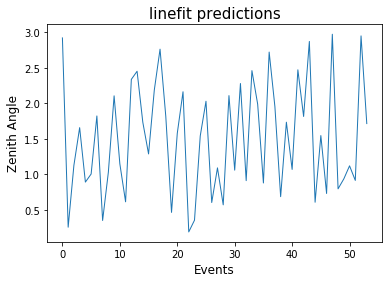

In [139]:
plt.plot(events,linefit_zenith,linewidth=1)
#plt.plot(events,llhfit_zenith)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Zenith Angle',fontsize=12)
plt.title("linefit predictions",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

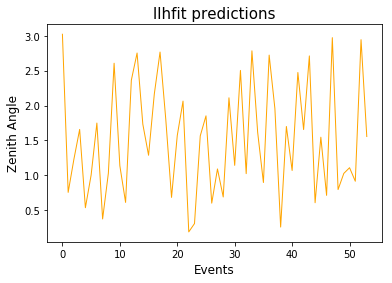

In [140]:
plt.plot(events,llhfit_zenith,color='orange',linewidth=1)
#plt.plot(events,llhfit_zenith)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Zenith Angle',fontsize=12)
plt.title("llhfit predictions",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

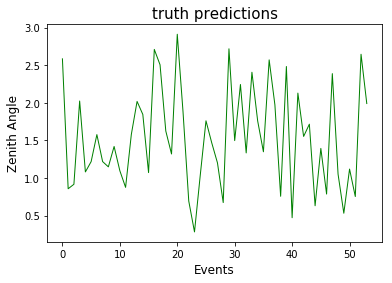

In [141]:
plt.plot(events,truth_zenith,color='green',linewidth=1)
#plt.plot(events,llhfit_zenith)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Zenith Angle',fontsize=12)
plt.title("truth predictions",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

In [24]:
accuracy_linefit=[]
accuracy_llhfit=[]
truth_zenith=[]
for i in range(0,10):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                accuracy_line=abs(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith)/frame['NuGPrimary'].dir.zenith
                accuracy_llh=abs(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith)/frame['NuGPrimary'].dir.zenith
                if(accuracy_line>=0 and accuracy_line<=1 and accuracy_llh>=0 and accuracy_llh<=1):
                    accuracy_linefit.append(1-accuracy_line)
                    accuracy_llhfit.append(1-accuracy_llh)
                    truth_zenith.append(frame['NuGPrimary'].dir.zenith)
    else:
        continue

In [25]:
events = np.arange(len(accuracy_linefit))

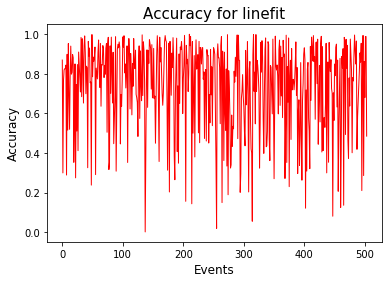

In [26]:
plt.plot(events,accuracy_linefit,color='red',linewidth=1)
#plt.plot(events,llhfit_zenith)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title("Accuracy for linefit",fontsize=15)
plt.ticklabel_format(style='plain')
#plt.ylim(0,1)
plt.show()

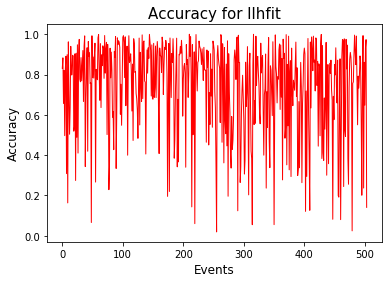

In [27]:
plt.plot(events,accuracy_llhfit,color='red',linewidth=1)
#plt.plot(events,llhfit_zenith)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title("Accuracy for llhfit",fontsize=15)
plt.ticklabel_format(style='plain')
#plt.ylim(0,1)
plt.show()

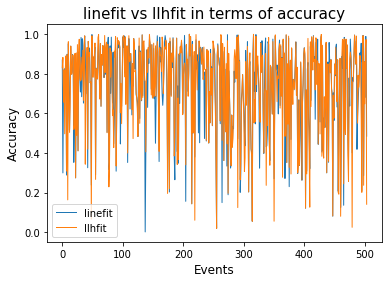

In [28]:
plt.plot(events,accuracy_linefit,linewidth=1,label='linefit')
plt.plot(events,accuracy_llhfit,linewidth=1,label='llhfit')
#plt.plot(events,llhfit_zenith)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title("linefit vs llhfit in terms of accuracy",fontsize=15)
plt.ticklabel_format(style='plain')
#plt.ylim(0,1)
plt.legend(loc='lower left')
plt.show()

In [29]:
truth_zenith=np.cos(truth_zenith)

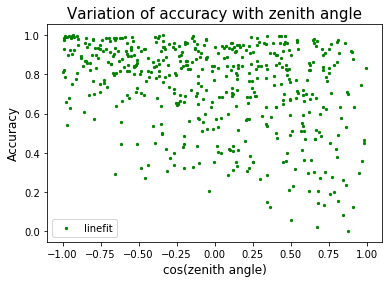

In [30]:
plt.scatter(truth_zenith,accuracy_linefit,color='green',s=5,label='linefit')
plt.xlabel("cos(zenith angle)",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.title("Variation of accuracy with zenith angle",fontsize=15)
plt.legend()
plt.show()

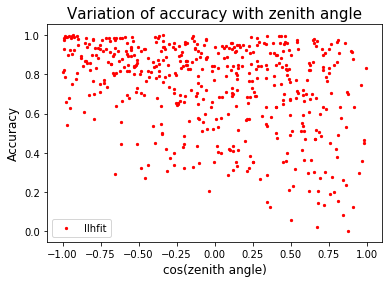

In [31]:
plt.scatter(truth_zenith,accuracy_linefit,color='red',s=5,label='llhfit')
plt.xlabel("cos(zenith angle)",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.title("Variation of accuracy with zenith angle",fontsize=15)
plt.legend()
plt.show()

In [19]:
accuracy_linefit=[]
accuracy_llhfit=[]
truth_zenith=[]
for i in range(0,10):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                accuracy_line=abs(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith)/frame['NuGPrimary'].dir.zenith
                accuracy_llh=abs(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith)/frame['NuGPrimary'].dir.zenith
                if(accuracy_line>=0 and accuracy_line<=1 and accuracy_llh>=0 and accuracy_llh<=1):
                    accuracy_linefit.append(1-accuracy_line)
                    accuracy_llhfit.append(1-accuracy_llh)
                    truth_zenith.append(frame['NuGPrimary'].dir.zenith)
    else:
        continue

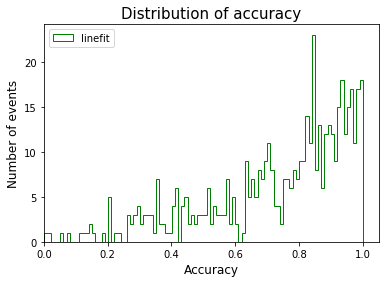

In [20]:
plt.hist(accuracy_linefit, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Accuracy',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Distribution of accuracy",fontsize=15)
plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

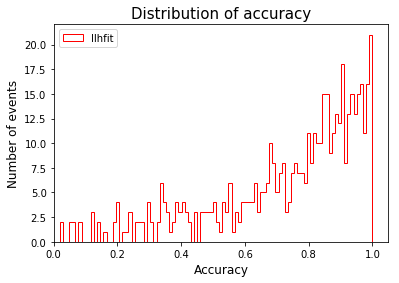

In [21]:
plt.hist(accuracy_llhfit, bins=100, histtype='step',label='llhfit',color='red')
plt.xlabel('Accuracy',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Distribution of accuracy",fontsize=15)
plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

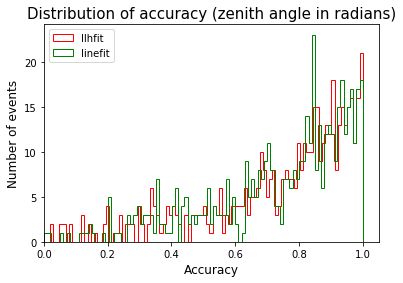

In [22]:
plt.hist(accuracy_llhfit, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(accuracy_linefit, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Accuracy',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Distribution of accuracy (zenith angle in radians)",fontsize=15)
plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

In [41]:
diff_linefit=[]
diff_llhfit=[]
for i in range(0,15):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                diff_linefit.append(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith)
                diff_llhfit.append(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith)
    else:
        continue

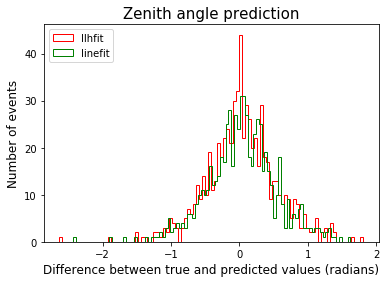

In [42]:
plt.hist(diff_llhfit, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Difference between true and predicted values (radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle prediction",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

In [24]:
diff_linefit_cosine=[]
diff_llhfit_cosine=[]
for i in range(0,15):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                diff_linefit_cosine.append(np.cos(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith))
                diff_llhfit_cosine.append(np.cos(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith))
    else:
        continue

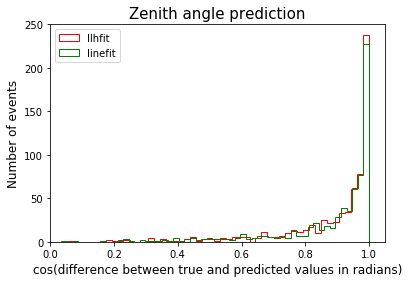

In [29]:
plt.hist(diff_llhfit_cosine, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_cosine, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(difference between true and predicted values in radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle prediction",fontsize=15)
plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

### 2. Linefit vs Likelihood fit (azimuthal angle)

In [43]:
diff_linefit=[]
diff_llhfit=[]
truth_zenith=[]
for i in range(0,15):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                diff_linefit.append(frame['NuGPrimary'].dir.phi-frame['linefit'].dir.phi)
                diff_llhfit.append(frame['NuGPrimary'].dir.phi-frame['llhfit'].dir.phi)
    else:
        continue

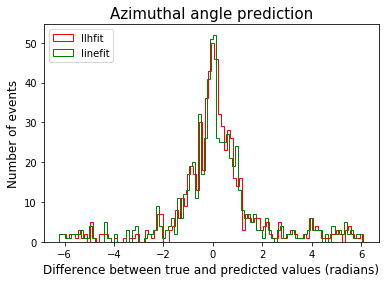

In [44]:
plt.hist(diff_llhfit, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Difference between true and predicted values (radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Azimuthal angle prediction",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

In [30]:
diff_linefit_cosine=[]
diff_llhfit_cosine=[]
for i in range(0,15):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                diff_linefit_cosine.append(np.cos(frame['NuGPrimary'].dir.phi-frame['linefit'].dir.phi))
                diff_llhfit_cosine.append(np.cos(frame['NuGPrimary'].dir.phi-frame['llhfit'].dir.phi))
    else:
        continue

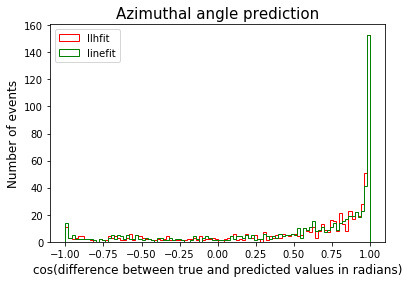

In [38]:
plt.hist(diff_llhfit_cosine, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_cosine, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(difference between true and predicted values in radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Azimuthal angle prediction",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

### 3. Taking the dot product between true and reconstructed tracks..

In [46]:
dot_linefit=[]
dot_llhfit=[]
sin=np.sin
cos=np.cos
for i in range(0,15):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                dot_linefit.append((sin(frame['NuGPrimary'].dir.zenith)*sin(frame['NuGPrimary'].dir.phi)*sin(frame['linefit'].dir.zenith)*sin(frame['linefit'].dir.phi)+sin(frame['NuGPrimary'].dir.zenith)*cos(frame['NuGPrimary'].dir.phi)*sin(frame['linefit'].dir.zenith)*cos(frame['linefit'].dir.phi)+cos(frame['NuGPrimary'].dir.zenith)*cos(frame['linefit'].dir.zenith)))
                dot_llhfit.append((sin(frame['NuGPrimary'].dir.zenith)*sin(frame['NuGPrimary'].dir.phi)*sin(frame['llhfit'].dir.zenith)*sin(frame['llhfit'].dir.phi)+sin(frame['NuGPrimary'].dir.zenith)*cos(frame['NuGPrimary'].dir.phi)*sin(frame['llhfit'].dir.zenith)*cos(frame['llhfit'].dir.phi)+cos(frame['NuGPrimary'].dir.zenith)*cos(frame['llhfit'].dir.zenith)))
    else:
        continue

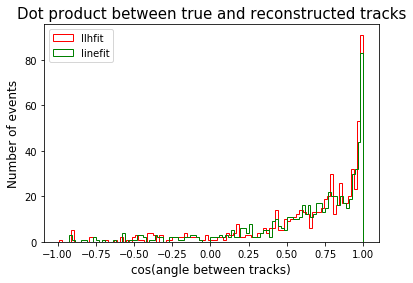

In [47]:
plt.hist(dot_llhfit, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(dot_linefit, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(angle between tracks)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Dot product between true and reconstructed tracks",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

### 4. Splitting into flavors...

In [51]:
diff_linefit_nue=[]
diff_llhfit_nue=[]
diff_linefit_numu=[]
diff_llhfit_numu=[]
diff_linefit_nutau=[]
diff_llhfit_nutau=[]
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")
            and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco198.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco223.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco390.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco393.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco397.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco646.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco656.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco657.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco658.i3.zst")):            
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                    diff_linefit_nue.append(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith)
                    diff_llhfit_nue.append(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith)
                elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                    diff_linefit_numu.append(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith)
                    diff_llhfit_numu.append(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith)
                elif(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                    diff_linefit_nutau.append(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith)
                    diff_llhfit_nutau.append(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith)
    else:
        continue

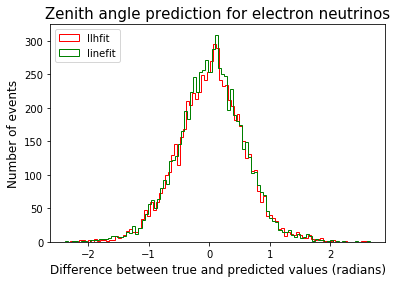

In [52]:
plt.hist(diff_llhfit_nue, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_nue, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Difference between true and predicted values (radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle prediction for electron neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

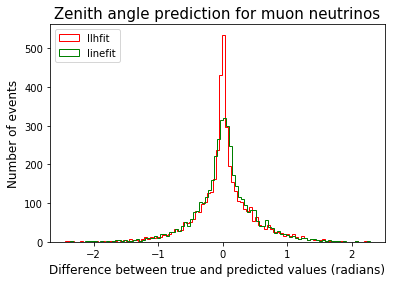

In [53]:
plt.hist(diff_llhfit_numu, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_numu, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Difference between true and predicted values (radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle prediction for muon neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

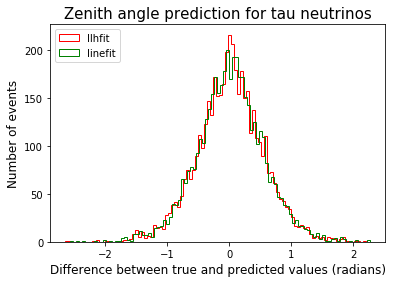

In [54]:
plt.hist(diff_llhfit_nutau, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_nutau, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Difference between true and predicted values (radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle prediction for tau neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

In [47]:
diff_linefit_nue=[]
diff_llhfit_nue=[]
diff_linefit_numu=[]
diff_llhfit_numu=[]
diff_linefit_nutau=[]
diff_llhfit_nutau=[]
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")
            and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco198.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco223.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco390.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco393.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco397.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco646.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco656.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco657.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco658.i3.zst")):            
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                    diff_linefit_nue.append(frame['NuGPrimary'].dir.phi-frame['linefit'].dir.phi)
                    diff_llhfit_nue.append(frame['NuGPrimary'].dir.phi-frame['llhfit'].dir.phi)
                elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                    diff_linefit_numu.append(frame['NuGPrimary'].dir.phi-frame['linefit'].dir.phi)
                    diff_llhfit_numu.append(frame['NuGPrimary'].dir.phi-frame['llhfit'].dir.phi)
                elif(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                    diff_linefit_nutau.append(frame['NuGPrimary'].dir.phi-frame['linefit'].dir.phi)
                    diff_llhfit_nutau.append(frame['NuGPrimary'].dir.phi-frame['llhfit'].dir.phi)
    else:
        continue

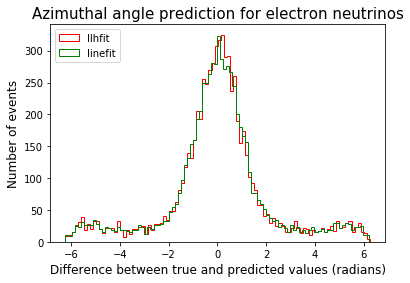

In [48]:
plt.hist(diff_llhfit_nue, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_nue, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Difference between true and predicted values (radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Azimuthal angle prediction for electron neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

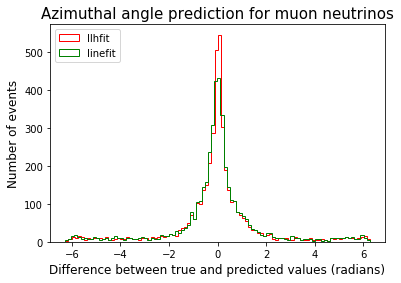

In [49]:
plt.hist(diff_llhfit_numu, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_numu, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Difference between true and predicted values (radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Azimuthal angle prediction for muon neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

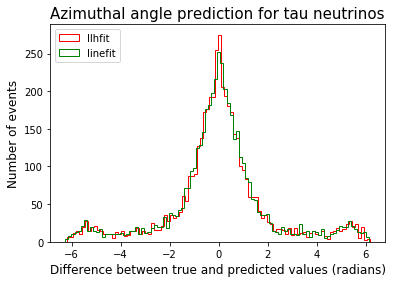

In [50]:
plt.hist(diff_llhfit_nutau, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_nutau, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('Difference between true and predicted values (radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Azimuthal angle prediction for tau neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

In [38]:
diff_linefit_nue_cosine=[]
diff_llhfit_nue_cosine=[]
diff_linefit_numu_cosine=[]
diff_llhfit_numu_cosine=[]
diff_linefit_nutau_cosine=[]
diff_llhfit_nutau_cosine=[]
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")
            and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco198.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco223.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco390.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco393.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco397.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco646.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco656.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco657.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco658.i3.zst")):             
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                    diff_linefit_nue_cosine.append(np.cos(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith))
                    diff_llhfit_nue_cosine.append(np.cos(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith))
                elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                    diff_linefit_numu_cosine.append(np.cos(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith))
                    diff_llhfit_numu_cosine.append(np.cos(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith))
                elif(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                    diff_linefit_nutau_cosine.append(np.cos(frame['NuGPrimary'].dir.zenith-frame['linefit'].dir.zenith))
                    diff_llhfit_nutau_cosine.append(np.cos(frame['NuGPrimary'].dir.zenith-frame['llhfit'].dir.zenith))
    else:
        continue

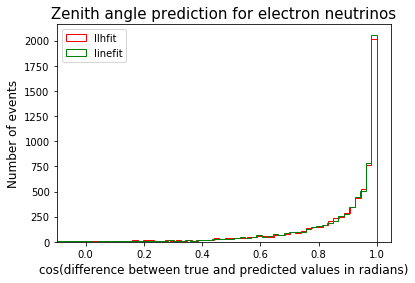

In [44]:
plt.hist(diff_llhfit_nue_cosine, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_nue_cosine, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(difference between true and predicted values in radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle prediction for electron neutrinos",fontsize=15)
plt.xlim(-0.1,1.05)
plt.legend(loc='upper left')
plt.show()

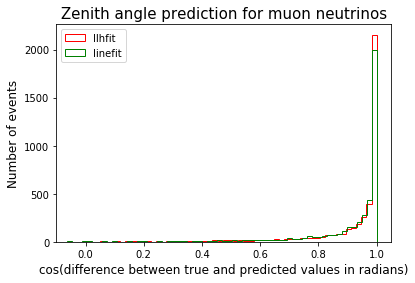

In [43]:
plt.hist(diff_llhfit_numu_cosine, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_numu_cosine, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(difference between true and predicted values in radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle prediction for muon neutrinos",fontsize=15)
plt.xlim(-0.1,1.05)
plt.legend(loc='upper left')
plt.show()

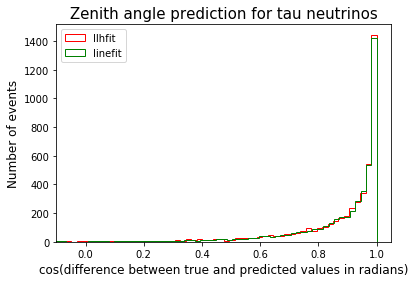

In [45]:
plt.hist(diff_llhfit_nutau_cosine, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_nutau_cosine, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(difference between true and predicted values in radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle prediction for tau neutrinos",fontsize=15)
plt.xlim(-0.1,1.05)
plt.legend(loc='upper left')
plt.show()

In [34]:
diff_linefit_nue_cosine=[]
diff_llhfit_nue_cosine=[]
diff_linefit_numu_cosine=[]
diff_llhfit_numu_cosine=[]
diff_linefit_nutau_cosine=[]
diff_llhfit_nutau_cosine=[]
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")
            and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco198.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco223.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco390.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco393.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco397.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco646.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco656.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco657.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco658.i3.zst")):             
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                    diff_linefit_nue_cosine.append(np.cos(frame['NuGPrimary'].dir.phi-frame['linefit'].dir.phi))
                    diff_llhfit_nue_cosine.append(np.cos(frame['NuGPrimary'].dir.phi-frame['llhfit'].dir.phi))
                elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                    diff_linefit_numu_cosine.append(np.cos(frame['NuGPrimary'].dir.phi-frame['linefit'].dir.phi))
                    diff_llhfit_numu_cosine.append(np.cos(frame['NuGPrimary'].dir.phi-frame['llhfit'].dir.phi))
                elif(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                    diff_linefit_nutau_cosine.append(np.cos(frame['NuGPrimary'].dir.phi-frame['linefit'].dir.phi))
                    diff_llhfit_nutau_cosine.append(np.cos(frame['NuGPrimary'].dir.phi-frame['llhfit'].dir.phi))
    else:
        continue

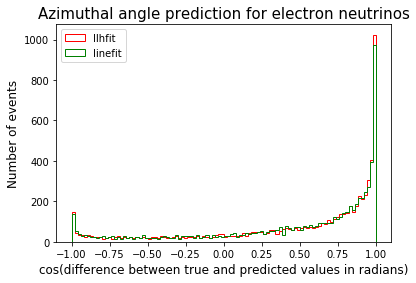

In [35]:
plt.hist(diff_llhfit_nue_cosine, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_nue_cosine, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(difference between true and predicted values in radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Azimuthal angle prediction for electron neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

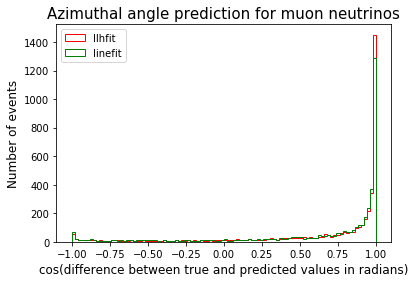

In [36]:
plt.hist(diff_llhfit_numu_cosine, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_numu_cosine, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(difference between true and predicted values in radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Azimuthal angle prediction for muon neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

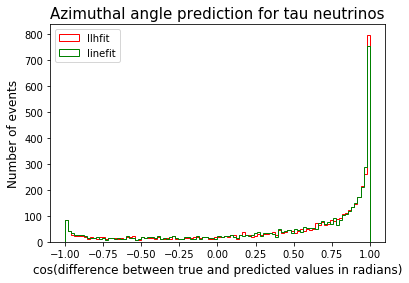

In [37]:
plt.hist(diff_llhfit_nutau_cosine, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(diff_linefit_nutau_cosine, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(difference between true and predicted values in radians)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Azimuthal angle prediction for tau neutrinos",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

In [2]:
dot_linefit_nue=[]
dot_llhfit_nue=[]
dot_linefit_numu=[]
dot_llhfit_numu=[]
dot_linefit_nutau=[]
dot_llhfit_nutau=[]
sin=np.sin
cos=np.cos
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")
            and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco198.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco223.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco390.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco393.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco397.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco646.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco656.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco657.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco658.i3.zst")):             
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):    
                    dot_linefit_nue.append((sin(frame['NuGPrimary'].dir.zenith)*sin(frame['NuGPrimary'].dir.phi)*sin(frame['linefit'].dir.zenith)*sin(frame['linefit'].dir.phi)+sin(frame['NuGPrimary'].dir.zenith)*cos(frame['NuGPrimary'].dir.phi)*sin(frame['linefit'].dir.zenith)*cos(frame['linefit'].dir.phi)+cos(frame['NuGPrimary'].dir.zenith)*cos(frame['linefit'].dir.zenith)))
                    dot_llhfit_nue.append((sin(frame['NuGPrimary'].dir.zenith)*sin(frame['NuGPrimary'].dir.phi)*sin(frame['llhfit'].dir.zenith)*sin(frame['llhfit'].dir.phi)+sin(frame['NuGPrimary'].dir.zenith)*cos(frame['NuGPrimary'].dir.phi)*sin(frame['llhfit'].dir.zenith)*cos(frame['llhfit'].dir.phi)+cos(frame['NuGPrimary'].dir.zenith)*cos(frame['llhfit'].dir.zenith)))
                elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):    
                    dot_linefit_numu.append((sin(frame['NuGPrimary'].dir.zenith)*sin(frame['NuGPrimary'].dir.phi)*sin(frame['linefit'].dir.zenith)*sin(frame['linefit'].dir.phi)+sin(frame['NuGPrimary'].dir.zenith)*cos(frame['NuGPrimary'].dir.phi)*sin(frame['linefit'].dir.zenith)*cos(frame['linefit'].dir.phi)+cos(frame['NuGPrimary'].dir.zenith)*cos(frame['linefit'].dir.zenith)))
                    dot_llhfit_numu.append((sin(frame['NuGPrimary'].dir.zenith)*sin(frame['NuGPrimary'].dir.phi)*sin(frame['llhfit'].dir.zenith)*sin(frame['llhfit'].dir.phi)+sin(frame['NuGPrimary'].dir.zenith)*cos(frame['NuGPrimary'].dir.phi)*sin(frame['llhfit'].dir.zenith)*cos(frame['llhfit'].dir.phi)+cos(frame['NuGPrimary'].dir.zenith)*cos(frame['llhfit'].dir.zenith)))
                if(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):    
                    dot_linefit_nutau.append((sin(frame['NuGPrimary'].dir.zenith)*sin(frame['NuGPrimary'].dir.phi)*sin(frame['linefit'].dir.zenith)*sin(frame['linefit'].dir.phi)+sin(frame['NuGPrimary'].dir.zenith)*cos(frame['NuGPrimary'].dir.phi)*sin(frame['linefit'].dir.zenith)*cos(frame['linefit'].dir.phi)+cos(frame['NuGPrimary'].dir.zenith)*cos(frame['linefit'].dir.zenith)))
                    dot_llhfit_nutau.append((sin(frame['NuGPrimary'].dir.zenith)*sin(frame['NuGPrimary'].dir.phi)*sin(frame['llhfit'].dir.zenith)*sin(frame['llhfit'].dir.phi)+sin(frame['NuGPrimary'].dir.zenith)*cos(frame['NuGPrimary'].dir.phi)*sin(frame['llhfit'].dir.zenith)*cos(frame['llhfit'].dir.phi)+cos(frame['NuGPrimary'].dir.zenith)*cos(frame['llhfit'].dir.zenith)))
    
    else:
        continue

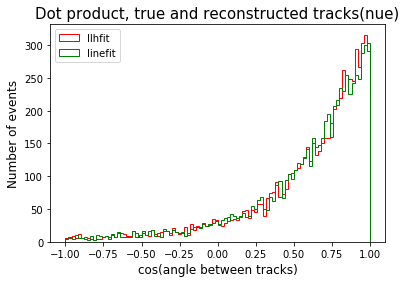

In [4]:
plt.hist(dot_llhfit_nue, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(dot_linefit_nue, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(angle between tracks)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Dot product, true and reconstructed tracks(nue)",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

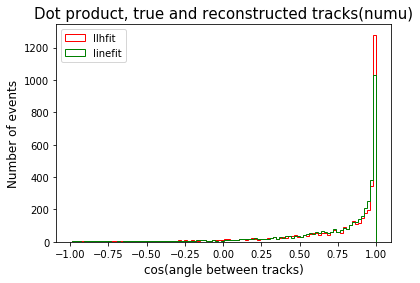

In [5]:
plt.hist(dot_llhfit_numu, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(dot_linefit_numu, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(angle between tracks)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Dot product, true and reconstructed tracks(numu)",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

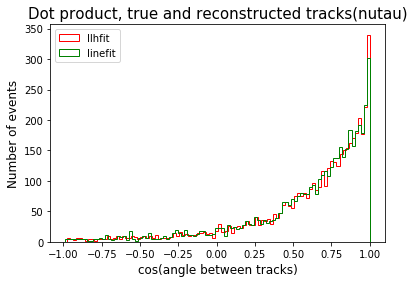

In [6]:
plt.hist(dot_llhfit_nutau, bins=100, histtype='step',label='llhfit',color='red')
plt.hist(dot_linefit_nutau, bins=100, histtype='step',label='linefit',color='green')
plt.xlabel('cos(angle between tracks)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Dot product, true and reconstructed tracks(nutau)",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

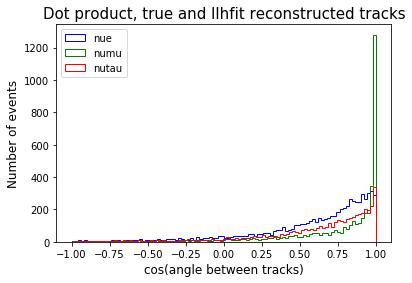

In [7]:
plt.hist(dot_llhfit_nue, bins=100, histtype='step',label='nue',color='blue')
plt.hist(dot_llhfit_numu, bins=100, histtype='step',label='numu',color='green')
plt.hist(dot_llhfit_nutau, bins=100, histtype='step',label='nutau',color='red')
plt.xlabel('cos(angle between tracks)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Dot product, true and llhfit reconstructed tracks",fontsize=15)
#plt.xlim(0,1.05)
plt.legend(loc='upper left')
plt.show()

### 5) Working with nloglike values...

#### a) The "good" fits

In [25]:
events=0
nloglike_cascade_nue=[]
nloglike_cascade_nutau=[]
nloglike_track_numu=[]
nfitparameters_llhfit=5
nfitparameters_nutau=4
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")
            and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco198.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco223.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco390.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco393.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco397.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco646.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco656.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco657.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco658.i3.zst")):            
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                events=events+1
                pulses=0
                pulseseriesmap=frame['SignificanHits']
                for omkey in pulseseriesmap.keys():
                    for pulse in pulseseriesmap[omkey]:
                        pulses=pulses+1
                if(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                    nloglike_cascade_nutau.append((frame['NuTau_nloglike'].value)/(pulses-nfitparameters_nutau))                
                elif(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                    nloglike_cascade_nue.append((frame['NuTau_nloglike'].value)/(pulses-nfitparameters_nutau))
                elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):                
                    nloglike_track_numu.append((frame['llhfit_nloglike'].value)/(pulses-nfitparameters_llhfit))
    else:
        continue

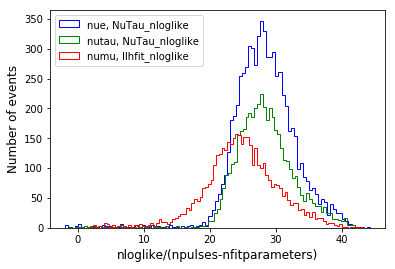

In [19]:
plt.hist(nloglike_cascade_nue, bins=100, histtype='step',label='nue, NuTau_nloglike',color='blue')
plt.hist(nloglike_cascade_nutau, bins=100, histtype='step',label='nutau, NuTau_nloglike',color='green')
plt.hist(nloglike_track_numu, bins=100, histtype='step',label='numu, llhfit_nloglike',color='red')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
#plt.title("Dot product between true and llhfit reconstructed tracks",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()

In [27]:
print(events)

15869


#### b) The "bad" fits

In [20]:
nloglike_track_nue=[]
nloglike_track_nutau=[]
nloglike_cascade_numu=[]
nfitparameters_llhfit=5
nfitparameters_nutau=4
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco54.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco155.i3.zst")
            and (infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco189.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco198.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco223.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco390.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco393.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco397.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco646.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco656.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco657.i3.zst")
            and(infile_name!="/data/p-one/kdutta/Neutau_reco/Nu_reco658.i3.zst")): 
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            for frame in infile:
                pulses=0
                pulseseriesmap=frame['SignificanHits']
                for omkey in pulseseriesmap.keys():
                    for pulse in pulseseriesmap[omkey]:
                        pulses=pulses+1
                if(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                    nloglike_track_nutau.append((frame['llhfit_nloglike'].value)/(pulses-nfitparameters_llhfit))                
                elif(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                    nloglike_track_nue.append((frame['llhfit_nloglike'].value)/(pulses-nfitparameters_llhfit))
                elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):                
                    nloglike_cascade_numu.append((frame['NuTau_nloglike'].value)/(pulses-nfitparameters_nutau))
    else:
        continue

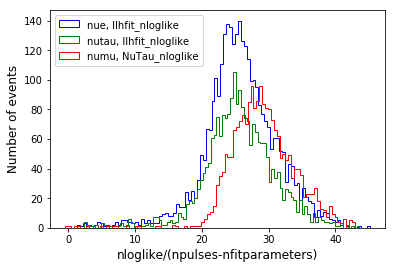

In [21]:
plt.hist(nloglike_track_nue, bins=100, histtype='step',label='nue, llhfit_nloglike',color='blue')
plt.hist(nloglike_track_nutau, bins=100, histtype='step',label='nutau, llhfit_nloglike',color='green')
plt.hist(nloglike_cascade_numu, bins=100, histtype='step',label='numu, NuTau_nloglike',color='red')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
#plt.title("Dot product between true and llhfit reconstructed tracks",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()

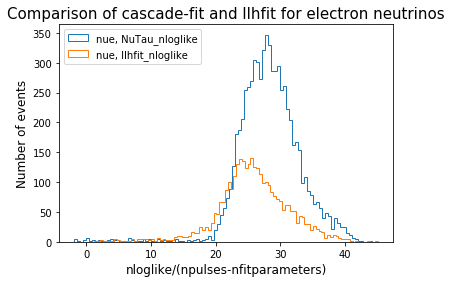

In [22]:
plt.hist(nloglike_cascade_nue, bins=100, histtype='step',label='nue, NuTau_nloglike')
plt.hist(nloglike_track_nue, bins=100, histtype='step',label='nue, llhfit_nloglike')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Comparison of cascade-fit and llhfit for electron neutrinos",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()

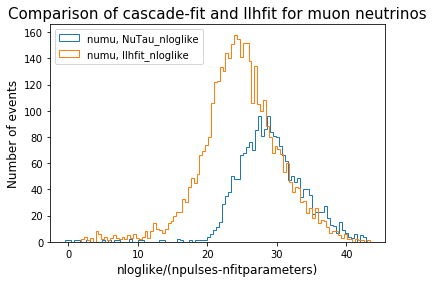

In [23]:
plt.hist(nloglike_cascade_numu, bins=100, histtype='step',label='numu, NuTau_nloglike')
plt.hist(nloglike_track_numu, bins=100, histtype='step',label='numu, llhfit_nloglike')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Comparison of cascade-fit and llhfit for muon neutrinos",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()

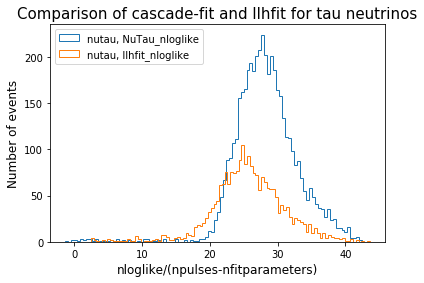

In [24]:
plt.hist(nloglike_cascade_nutau, bins=100, histtype='step',label='nutau, NuTau_nloglike')
plt.hist(nloglike_track_nutau, bins=100, histtype='step',label='nutau, llhfit_nloglike')
plt.xlabel('nloglike/(npulses-nfitparameters)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Comparison of cascade-fit and llhfit for tau neutrinos",fontsize=15)
#plt.xlim(-1000,10000)
plt.legend(loc='upper left')
plt.show()